In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [26]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [27]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_greedy_decoding.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_greedy_decoding.csv


In [28]:
%%time
os.environ["TOKENIZERS_PARALLELISM"] = "true"

!python --version
!pip show torch transformers

Python 3.11.9
Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, torchaudio, torchvision
---
Name: transformers
Version: 4.43.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenize

In [29]:
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

device = check_gpu()

MPS is available


In [30]:
import pandas as pd

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   chinese                                          1133 non-null   object
 1   english                                          1133 non-null   object
 2   Qwen/Qwen2-7B-Instruct/rpp-1.00                  1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/rpp-1.02                  1133 non-null   object
 4   Qwen/Qwen2-7B-Instruct/rpp-1.04                  1133 non-null   object
 5   Qwen/Qwen2-7B-Instruct/rpp-1.06                  1133 non-null   object
 6   Qwen/Qwen2-7B-Instruct/rpp-1.08                  1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/rpp-1.10                  1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/rpp-1.12                  1133 non-null   object
 9   Qwen/Qwen2-7B-Instruct/rpp-1.14          

In [31]:
columns = df.columns[2:].to_list()
columns.sort()
columns = df.columns[:2].to_list() + columns
columns

['chinese',
 'english',
 'Qwen/Qwen2-72B-Instruct/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/rpp-1.10',
 'Qwen/Qwen2-7B-Instruct/rpp-1.12',
 'Qwen/Qwen2-7B-Instruct/rpp-1.14',
 'Qwen/Qwen2-7B-Instruct/rpp-1.16',
 'Qwen/Qwen2-7B-Instruct/rpp-1.18',
 'Qwen/Qwen2-7B-Instruct/rpp-1.20',
 'Qwen/Qwen2-7B-Instruct/rpp-1.22',
 'Qwen/Qwen2-7B-Instruct/rpp-1.24',
 'Qwen/Qwen2-7B-Instruct/rpp-1.26',
 'Qwen/Qwen2-7B-Instruct/rpp-1.28',
 'Qwen/Qwen2-7B-Instruct/rpp-1.30',
 'internlm/internlm2_5-7b-chat-1m/rpp-1.00',
 'internlm/internlm2_5-7b-chat-1m/rpp-1.02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.04',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.06']

In [32]:
df = df[columns]

In [33]:
metrics_df = get_metrics(df)
metrics_df

Qwen/Qwen2-72B-Instruct/rpp-1.00: {'meteor': 0.39496912014495184, 'bleu_scores': {'bleu': 0.12294894050451377, 'precisions': [0.42391407360606537, 0.1626695498329074, 0.079349416448331, 0.041761041902604754], 'brevity_penalty': 1.0, 'length_ratio': 1.048526001987413, 'translation_length': 31655, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44242617045618315, 'rouge2': 0.19166824249542752, 'rougeL': 0.3835643396648639, 'rougeLsum': 0.3844919778233326}, 'accuracy': 0.0, 'correct_ids': []}
Qwen/Qwen2-7B-Instruct/rpp-1.00: {'meteor': 0.3757937058055942, 'bleu_scores': {'bleu': 0.11257687997946404, 'precisions': [0.4221057489451477, 0.15152552819915763, 0.07046669041681511, 0.03563738956121464], 'brevity_penalty': 1.0, 'length_ratio': 1.004836038423319, 'translation_length': 30336, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4241235957669323, 'rouge2': 0.17433830983598061, 'rougeL': 0.3642501836106533, 'rougeLsum': 0.364584190239183}, 'accuracy': 0.00088261253309797

model   rpp    meteor    bleu_1  \
0                  Qwen/Qwen2-72B-Instruct  1.00  0.394969  0.122949   
1                   Qwen/Qwen2-7B-Instruct  1.00  0.375794  0.112577   
2                   Qwen/Qwen2-7B-Instruct  1.02  0.376816  0.115539   
3                   Qwen/Qwen2-7B-Instruct  1.04  0.371515  0.113116   
4                   Qwen/Qwen2-7B-Instruct  1.06  0.372161  0.109860   
5                   Qwen/Qwen2-7B-Instruct  1.08  0.371297  0.108095   
6                   Qwen/Qwen2-7B-Instruct  1.10  0.371353  0.108097   
7                   Qwen/Qwen2-7B-Instruct  1.12  0.368204  0.105056   
8                   Qwen/Qwen2-7B-Instruct  1.14  0.363077  0.100516   
9                   Qwen/Qwen2-7B-Instruct  1.16  0.360604  0.095724   
10                  Qwen/Qwen2-7B-Instruct  1.18  0.360785  0.095713   
11                  Qwen/Qwen2-7B-Instruct  1.20  0.356755  0.091249   
12                  Qwen/Qwen2-7B-Instruct  1.22  0.351004  0.083507   
13                  Qwen/Qwen2-7B-Instruct  1.24  0.346560  0.079543   
14                  Qwen/Qwen2-7B-Instruct  1.26  0.343517  0.078588   
15                  Qwen/Qwen2-7B-Instruct  1.28  0.340534  0.072038   
16                  Qwen/Qwen2-7B-Instruct  1.30  0.334469  0.062148   
17         internlm/internlm2_5-7b-chat-1m  1.00  0.371535  0.105977   
18         internlm/internlm2_5-7b-chat-1m  1.02  0.352901  0.086979   
19  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.381686  0.115183   
20  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.381085  0.114341   
21  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.380191  0.113532   
22  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.378622  0.112205   

     rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.383564   0.000000          0.360989           0.360989   
1   0.364250   0.000000          0.265666           0.265666   
2   0.369539   0.000000          0.255958           0.255958   
3   0.363711   0.000000          0.268314           0.268314   
4   0.360878   0.000000          0.281553           0.281553   
5   0.359401   0.000000          0.211827           0.211827   
6   0.359469   0.000000          0.253310           0.253310   
7   0.358380   0.000000          0.440424           0.440424   
8   0.349606   0.000000          0.280671           0.280671   
9   0.350540   0.000000          0.265666           0.265666   
10  0.344178   0.000000          0.285966           0.285966   
11  0.344236   0.000000          0.291262           0.291262   
12  0.336692   0.000000          0.269197           0.269197   
13  0.333088   0.000000          0.300971           0.300971   
14  0.330214   0.000000          0.266549           0.266549   
15  0.326096   0.000000          0.184466           0.184466   
16  0.321869   0.005296          0.325684           0.330980   
17  0.363133   0.000000          5.540159           5.540159   
18  0.339999   0.000000          0.307149           0.307149   
19  0.370572   0.000000          0.406884           0.406884   
20  0.369876   0.000000          0.433363           0.433363   
21  0.369389   0.000000          0.423654           0.423654   
22  0.368934   0.000000          0.423654           0.423654   

    num_entries_with_max_output_tokens  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  
5                                    0  
6                                    0  
7                                    0  
8                                    0  
9                                    0  
10                                   0  
11                                   0  
12                                   0  
13                                   0  
14                                   0  
15                                   0  
16                                   1  
17                               

In [34]:
metrics_df["rap"] = metrics_df.apply(
    lambda x: x["meteor"] / math.log10(10 + x["total_repetitions"]), axis=1
)

In [35]:
metrics_df

model   rpp    meteor    bleu_1  \
0                  Qwen/Qwen2-72B-Instruct  1.00  0.394969  0.122949   
1                   Qwen/Qwen2-7B-Instruct  1.00  0.375794  0.112577   
2                   Qwen/Qwen2-7B-Instruct  1.02  0.376816  0.115539   
3                   Qwen/Qwen2-7B-Instruct  1.04  0.371515  0.113116   
4                   Qwen/Qwen2-7B-Instruct  1.06  0.372161  0.109860   
5                   Qwen/Qwen2-7B-Instruct  1.08  0.371297  0.108095   
6                   Qwen/Qwen2-7B-Instruct  1.10  0.371353  0.108097   
7                   Qwen/Qwen2-7B-Instruct  1.12  0.368204  0.105056   
8                   Qwen/Qwen2-7B-Instruct  1.14  0.363077  0.100516   
9                   Qwen/Qwen2-7B-Instruct  1.16  0.360604  0.095724   
10                  Qwen/Qwen2-7B-Instruct  1.18  0.360785  0.095713   
11                  Qwen/Qwen2-7B-Instruct  1.20  0.356755  0.091249   
12                  Qwen/Qwen2-7B-Instruct  1.22  0.351004  0.083507   
13                  Qwen/Qwen2-7B-Instruct  1.24  0.346560  0.079543   
14                  Qwen/Qwen2-7B-Instruct  1.26  0.343517  0.078588   
15                  Qwen/Qwen2-7B-Instruct  1.28  0.340534  0.072038   
16                  Qwen/Qwen2-7B-Instruct  1.30  0.334469  0.062148   
17         internlm/internlm2_5-7b-chat-1m  1.00  0.371535  0.105977   
18         internlm/internlm2_5-7b-chat-1m  1.02  0.352901  0.086979   
19  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.381686  0.115183   
20  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.381085  0.114341   
21  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.380191  0.113532   
22  shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.378622  0.112205   

     rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.383564   0.000000          0.360989           0.360989   
1   0.364250   0.000000          0.265666           0.265666   
2   0.369539   0.000000          0.255958           0.255958   
3   0.363711   0.000000          0.268314           0.268314   
4   0.360878   0.000000          0.281553           0.281553   
5   0.359401   0.000000          0.211827           0.211827   
6   0.359469   0.000000          0.253310           0.253310   
7   0.358380   0.000000          0.440424           0.440424   
8   0.349606   0.000000          0.280671           0.280671   
9   0.350540   0.000000          0.265666           0.265666   
10  0.344178   0.000000          0.285966           0.285966   
11  0.344236   0.000000          0.291262           0.291262   
12  0.336692   0.000000          0.269197           0.269197   
13  0.333088   0.000000          0.300971           0.300971   
14  0.330214   0.000000          0.266549           0.266549   
15  0.326096   0.000000          0.184466           0.184466   
16  0.321869   0.005296          0.325684           0.330980   
17  0.363133   0.000000          5.540159           5.540159   
18  0.339999   0.000000          0.307149           0.307149   
19  0.370572   0.000000          0.406884           0.406884   
20  0.369876   0.000000          0.433363           0.433363   
21  0.369389   0.000000          0.423654           0.423654   
22  0.368934   0.000000          0.423654           0.423654   

    num_entries_with_max_output_tokens       rap  
0                                    0  0.388978  
1                                    0  0.371563  
2                                    0  0.372725  
3                                    0  0.367291  
4                                    0  0.367727  
5                                    0  0.367947  
6                                    0  0.367362  
7                                    0  0.361439  
8                                    0  0.358765  
9                                    0  0.356544  
10                                   0  0.356421  
11                                   0  0.352361  
12                                   0  0.347001  
13                                   0  0.342154  
14    

In [36]:
models = metrics_df["model"].unique()

In [37]:
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat-1m',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat'], dtype=object)

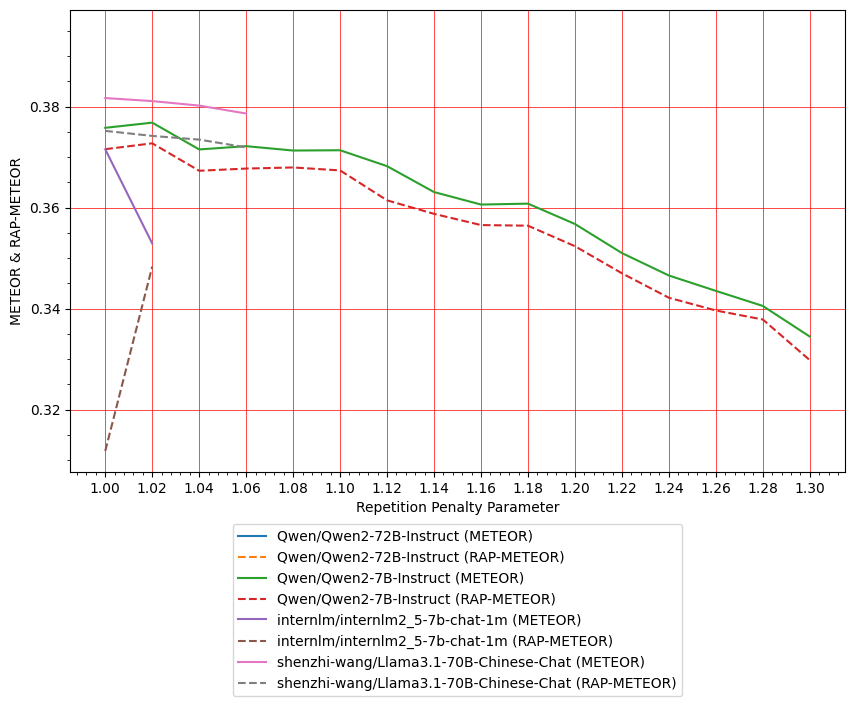

In [38]:
# plot meteor vs rpp

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["meteor"], label=model + " (METEOR)")
    ax.plot(
        model_df["rpp"], model_df["rap"], label=model + " (RAP-METEOR)", linestyle="--"
    )

ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("METEOR & RAP-METEOR")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5))
plt.show()

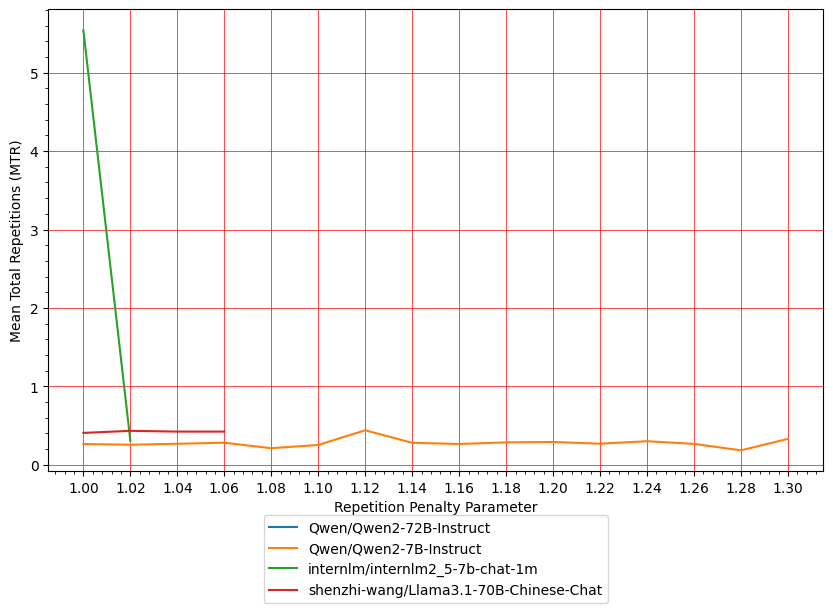

In [49]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["total_repetitions"], label=model)


ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Mean Total Repetitions (MTR)")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
plt.show()

In [40]:
tokenizers = {model: load_tokenizer(model) for model in models}

In [42]:
col = "internlm/internlm2_5-7b-chat-1m/rpp-1.00"
df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
    detect_scores
)
df["output_tokens"] = df[col].apply(
    lambda x: len(tokenizers[col.split("/rpp")[0]](x)["input_ids"])
)

In [43]:
rows = df.query("total_repetitions > 1000")
rows

chinese  \
503  青天哟——蓝天哟——花花绿绿的天哟——棒槌哟亲哥哟你死了——可就塌了妹妹的天哟——   

                                               english  \
503  A blue sky yo – a sapphire sky yo – a painted ...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.00  \
503  Blue sky oh—clear sky oh—colorful sky oh—my de...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.00  \
503  Blue sky oh - blue heaven oh - colorful sky oh...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.02  \
503  Blue heaven—oh, blue sky—oh, colorful sky—stic...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.04  \
503  Blue heaven—oh, blue sky—oh, colorful sky—stup...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.06  \
503  Blue sky oh - blue heaven oh - colorful sky oh...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.08  \
503  Blue sky—oh, blue heaven—colorful sky—stupid f...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.10  \
503  Blue sky - oh blue heaven - colorful sky - you...   

                       Qwen/Qwen2-7B-Instruct/rpp-1.12  ...  \
503  Blue sky - oh blue sky - colorful sky - you've...  ...   

              internlm/internlm2_5-7b-chat-1m/rpp-1.00  \
503  Oh, the blue sky, the blue sky, the sky with i...   

              internlm/internlm2_5-7b-chat-1m/rpp-1.02  \
503  Oh blue sky - oh green sky - oh colorful sky -...   

       shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.00  \
503  Blue sky, oh — Green sky, oh — Colorful sky, o...   

       shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.02  \
503  Blue sky, oh — Green sky, oh — Colorful sky, o...   

       shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.04  \
503  Blue sky, oh — Green sky, oh — Colorful sky, o...   

       shenzhi-wang/Llama3.1-70B-Chinese-Chat/rpp-1.06 ews_score  \
503  Blue sky, oh — Green sky, oh — Colorful sky, o...         0   

    repetition_score total_repetitions output_tokens  
503             6112              6112          2049  

[1 rows x 29 columns]

In [44]:
row = rows.iloc[0]

In [45]:
print(row["chinese"])

青天哟——蓝天哟——花花绿绿的天哟——棒槌哟亲哥哟你死了——可就塌了妹妹的天哟——


In [46]:
print(row["english"])

A blue sky yo – a sapphire sky yo – a painted sky yo – a mighty cudgel yo – dear elder brother yo – death has claimed you – you have brought down little sister's sky yo –.


In [47]:
output = row[col]
print(output)
detect_repetitions(output, debug=True)

Oh, the blue sky, the blue sky, the sky with its colorful hues, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, the sky, 

(0, 6112, 6112)

In [48]:
df.describe()

ews_score  repetition_score  total_repetitions  output_tokens
count     1133.0       1133.000000        1133.000000    1133.000000
mean         0.0          5.540159           5.540159      32.254192
std          0.0        181.583867         181.583867      63.482231
min          0.0          0.000000           0.000000       4.000000
25%          0.0          0.000000           0.000000      16.000000
50%          0.0          0.000000           0.000000      25.000000
75%          0.0          0.000000           0.000000      38.000000
max          0.0       6112.000000        6112.000000    2049.000000

In [50]:
for model in models:
    df[f"ground_truth_tokens-{model}"] = df["english"].apply(
        lambda x: len(tokenizers[model](x)["input_ids"])
    )

df.describe()

loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


ews_score  repetition_score  total_repetitions  output_tokens  \
count     1133.0       1133.000000        1133.000000    1133.000000   
mean         0.0          5.540159           5.540159      32.254192   
std          0.0        181.583867         181.583867      63.482231   
min          0.0          0.000000           0.000000       4.000000   
25%          0.0          0.000000           0.000000      16.000000   
50%          0.0          0.000000           0.000000      25.000000   
75%          0.0          0.000000           0.000000      38.000000   
max          0.0       6112.000000        6112.000000    2049.000000   

       ground_truth_tokens-Qwen/Qwen2-72B-Instruct  \
count                                  1133.000000   
mean                                     29.458076   
std                                      20.126659   
min                                       1.000000   
25%                                      16.000000   
50%                                      25.000000   
75%                                      38.000000   
max                                     135.000000   

       ground_truth_tokens-Qwen/Qwen2-7B-Instruct  \
count                                 1133.000000   
mean                                    29.458076   
std                                     20.126659   
min                                      1.000000   
25%                                     16.000000   
50%                                     25.000000   
75%                                     38.000000   
max                                    135.000000   

       ground_truth_tokens-internlm/internlm2_5-7b-chat-1m  \
count                                        1133.000000     
mean                                           31.362754     
std                                            20.786945     
min                                             2.000000     
25%                                            17.000000     
50%                                            26.000000     
75%                                            40.000000     
max                                           139.000000     

       ground_truth_tokens-shenzhi-wang/Llama3.1-70B-Chinese-Chat  
count                                        1133.000000           
mean                                           29.432480           
std                                            20.076666           
min                                             1.000000           
25%                                            16.000000           
50%                                            25.000000           
75%                                            38.000000           
max                                           135.000000